The required packages are imported.

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

The `iris` dataset is used to perform classification of type of iris flower species.

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target
names = iris.feature_names

The dataset is split into train and test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=29)

Gaussian Naïve Bayes classifier is trained to perform the classification.

In [5]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

The evaluation metrics on test dataset like accuracy and confusion matrix are shown.

Accuracy:  0.9333333333333333


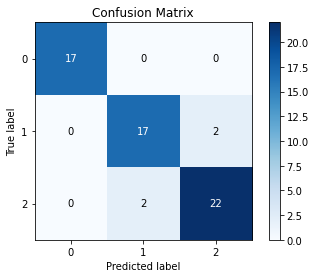

In [6]:
y_predict = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_predict))

plot_confusion_matrix(y_test, y_predict)
plt.show()

The decision boundaries of the classifier is visualised with the help of a feature-wise pair plot.

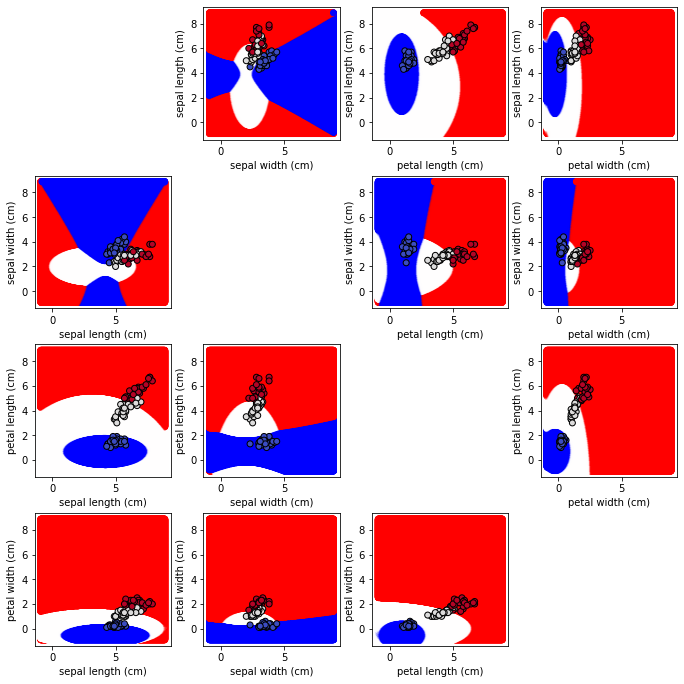

In [7]:
n_features = X.shape[-1]
p = np.arange(n_features)
p1, p2 = np.meshgrid(p, p)
pairs = np.stack([p1.flatten(), p2.flatten()]).T

x1_min, x1_max = X.min() - 1, X.max() + 1
x2_min, x2_max = X.min() - 1, X.max() + 1

plt.figure(figsize=(10, 10))

for index, pair in enumerate(pairs):
    if pair[0] == pair[1]:
        continue
    
    clf = GaussianNB()
    clf.fit(X_train[:, pair], y_train)
    
    x1 = np.arange(x1_min, x1_max, 0.02)
    x2 = np.arange(x2_min, x2_max, 0.02)
    ux, uy = np.meshgrid(x1, x2)
    u = np.stack([ux.flatten(), uy.flatten()]).T
    
    yp = clf.predict(u)
    
    plt.subplot(n_features, n_features, index + 1)
    
    plt.scatter(u[:, 0], 
                u[:, 1], 
                c=yp, 
                cmap='bwr')
    plt.scatter(X_train[:, pair[0]], 
                X_train[:, pair[1]], 
                marker='o',
                c=y_train, 
                edgecolor='black',
                cmap='coolwarm')
    
    plt.xlabel(names[pair[0]])
    plt.ylabel(names[pair[1]])
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
plt.show()